In [1]:
!pip install paramiko

Conexión al server mediante SSH

In [1]:
import ibexV2
ssh = ibexV2.connect("158.251.88.197")

Cargando ibex...


login: iaraya
pass: ········


Se obtienen las instancias de prueba

In [2]:
ibexV2.get_instances(ssh)

binh.txt cf3-3.txt cf3-5.txt ctp1-3.txt ctp1-5.txt ctp2-3.txt ctp2-5.txt ctp6-3.txt ctp6-4.txt ctp7-4.txt ctp7-5.txt kim.txt mop-10.txt mop-13.txt mop-7.txt nbi.txt osy.txt sr.txt tan.txt test.txt wb.txt 

Se obtienen las soluciones


Cargando ibex...
Se filtraron 1 puntos
[  6.42843912   6.42843929   7.57827684   7.57827684   7.57827701
  13.17612516  13.17612516  13.17612542  13.42600928  13.42600928
  13.65367802  14.95101709  14.95101709  16.32924953  24.3
  24.3         29.53864072  32.15926241  32.15926241  37.93889213
  37.93889213  37.93889291  45.43813309  49.32594029  53.70403711
  53.70403711  53.70403711  56.06655308  59.47396726  59.47396726
  79.29199921  79.29199921  88.38426635  97.2         97.2
 126.73449463 136.         136.        ] [38.92992642 38.92992642 38.26548323 38.1302341  38.1302341  34.91188488
 27.62748998 27.62748998 27.53417825 27.44916209 27.44916209 26.9647092
 26.45004908 26.45004908 23.47360816 21.51739278 21.51739278 20.53879915
 17.9417644  17.9417644  16.53912993 16.53912993 15.5801978  14.12841123
 11.61132893 11.61132893 11.61132883 11.61132883 10.33893082 10.33893072
 10.33893072  8.35020325  8.35020325  5.18478567  5.18478557  5.18478557
  4.0000001   4.        ]
El hiperv

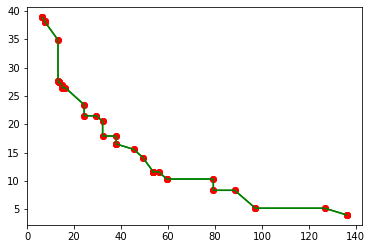

In [14]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
importlib.reload(ibexV2) #recarga el archivo en caso de modificación

%matplotlib inline

instance = "binh.txt"
prec = 10 #precisión para el solver

#Aquí se llama al solver
y1, y2 = ibexV2.solve(ssh, instance, prec=prec)

#y1 = np.array([3.53,3.53, 7.85, 13.75, 17.68,  19.26,25.03, 29.16,    36.5   ])
#y2 = np.array([24.6, 21.6, 21.6, 19.55, 16.34, 11.56, 9.72, 5.07, 5.07])

ibexV2.filtrado_puntos(y1,y2)
ibexV2.hipervolumen(y1,y2)

#plot
plt.plot(y1, y2, 'ro', y1, y2, 'g-')
plt.show()

Se reducen los puntos que tienen coordenadas iguales

Se calcula la menor area de las soluciones y a que punto corresponde 

In [15]:
import importlib
importlib.reload(ibexV2)
#aqui se llama a la funcion para que calcule la menor area y a que punto corresponde
punto, area = ibexV2.menorArea(y1,y2)

Cargando ibex...
Se calcula la menor area
El menor area es:  1.2233837116006476e-19 y corresponde al punto 26 



Se calcula si el punto se encuentra sobre o debajo el segmento formado entre el punto anterior y el siguiente

Con el punto anteriormente señalado se obtiene un subconjunto de puntos pertenecientes al punto anterior, el que se selecciono y el siguiente

Coordenadas X de los puntos [53.70403711 53.70403711 53.70403711]
Coordenadas Y de los puntos [11.61132893 11.61132893 11.61132883]
Luego con los 3 puntos se calcula si el punto esta sobre o debajo el segmento formado entre los puntos de los extremos, arrojando 2 posibles casos:

~ El punto esta sobre el segmento
~ El punto esta por debajo del segmento

El punto 26 se encuentra sobre el segmento


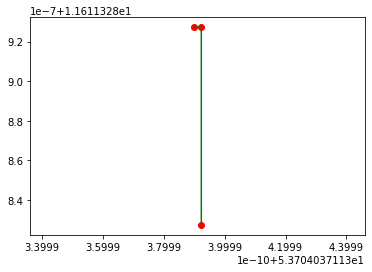

In [16]:
#se llama a la funcion la cual ve si el punto esta por sobre o debajo el segmento
h1,h2 = ibexV2.posicion_punto(y1,y2,punto+1)

#se grafica para situar visualmente el punto
plt.plot(h1, h2, 'ro', h1, h2, 'g-')
plt.show()

Se elimina un punto del conjunto de soluciones

El punto a eliminar será el 53.70403711339229 11.61132892725771
Se muestra graficamente el punto que se ira a eliminar
Luego de eliminarse se vuelve a graficar la serie de puntos 


<function matplotlib.pyplot.show>

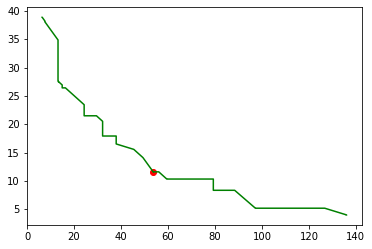

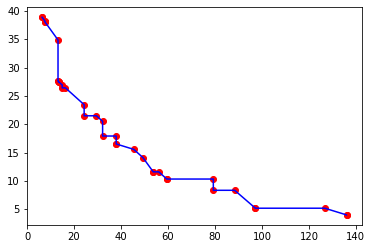

In [17]:
#Se llama a la funcion la cual elimina el punto señalado
y1,y2 = ibexV2.elimina_punto(y1,y2,punto+1)

#se grafican los puntos, si el punto eliminado estaba cerca de otro en algunos casos no se logra apreciar el cambio
fig2 = plt.figure("grafica 2")
plt.plot(y1, y2, 'ro',y1, y2, 'b-')
plt.show

Se eliminan una serie de puntos del conjunto de soluciones

Coordenadas X del conjunto:  [  7.57827684   7.57827684   7.57827701  13.17612516  13.17612516
  13.17612542  13.42600928  13.42600928  13.65367802  14.95101709
  14.95101709  16.32924953  24.3         24.3         29.53864072
  32.15926241  32.15926241  37.93889213  37.93889213  37.93889291
  45.43813309  49.32594029  53.70403711  53.70403711  56.06655308
  59.47396726  59.47396726  79.29199921  79.29199921  88.38426635
  97.2         97.2        126.73449463]
Coordenadas y del conjunto:  [38.26548323 38.1302341  38.1302341  34.91188488 27.62748998 27.62748998
 27.53417825 27.44916209 27.44916209 26.9647092  26.45004908 26.45004908
 23.47360816 21.51739278 21.51739278 20.53879915 17.9417644  17.9417644
 16.53912993 16.53912993 15.5801978  14.12841123 11.61132893 11.61132893
 11.61132883 10.33893082 10.33893072 10.33893072  8.35020325  8.35020325
  5.18478567  5.18478557  5.18478557]
El hipervolumen inicial es de 3315.2523812097943
----------------------Iteracion 1 --------------------

C:\Users\Dell\Documents\research_on_github\ibexmop_rp\funciones.py:232: RuntimeWarning: divide by zero encountered in double_scalars
  m2 = (h2[pto+2]-h2[pto+1])/(h1[pto+2]-h1[pto+1])


<function matplotlib.pyplot.show>

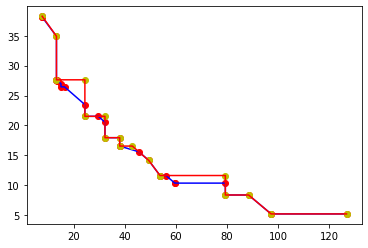

In [18]:
#se llama a la funcion para eliminar una cierta cantidad de puntos
y1, y2 = ibexV2.reduc_puntos(y1,y2,16)

#se vuelven a graficar las soluciones con los puntos ya eliminados
plt.plot(y1, y2, 'yo',y1, y2, 'r-')
plt.show